2024-06-04 13:39:44.572481: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 13:39:46.891264: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-04 13:39:49.200481: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-04 13:39:50.584230: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

Epoch [1000/10000], Loss D: 0.9212377071380615, Loss G: 1.2029649019241333
Epoch [2000/10000], Loss D: 0.8271884918212891, Loss G: 1.1918855905532837
Epoch [3000/10000], Loss D: 0.9204528331756592, Loss G: 1.0942342281341553
Epoch [4000/10000], Loss D: 1.0377156734466553, Loss G: 1.2297859191894531
Epoch [5000/10000], Loss D: 0.9800525307655334, Loss G: 1.1397086381912231
Epoch [6000/10000], Loss D: 0.8646533489227295, Loss G: 1.1491973400115967
Epoch [7000/10000], Loss D: 0.9591476917266846, Loss G: 1.0647165775299072
Epoch [8000/10000], Loss D: 0.9080708026885986, Loss G: 1.0449678897857666
Epoch [9000/10000], Loss D: 0.7813843488693237, Loss G: 1.1006953716278076
Epoch [10000/10000], Loss D: 0.9089685678482056, Loss G: 1.129196286201477


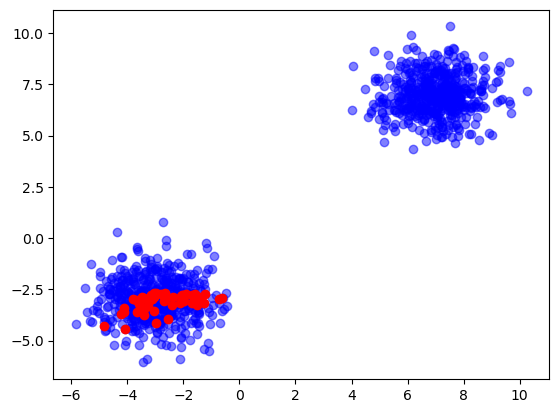

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# generator
class Generator(nn.Module):
    def __init__(self, input_dim, output_dim):
        super(Generator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )
    
    def forward(self, x):
        return self.model(x)

# discriminator
class Discriminator(nn.Module):
    def __init__(self, input_dim):
        super(Discriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

# Parameters
z_dim = 2
data_dim = 2
num_epochs = 10000
batch_size = 64
learning_rate = 0.0002

# Data generation
def generate_real_data(num_samples):
    circle_1 = np.random.randn(num_samples // 2, 2) + np.array([7, 7])
    circle_2 = np.random.randn(num_samples // 2, 2) + np.array([-3, -3])
    return np.vstack((circle_1, circle_2)).astype(np.float32)

real_data = torch.tensor(generate_real_data(1000))

# Create models
generator = Generator(z_dim, data_dim)
discriminator = Discriminator(data_dim)

# Loss and optimizers
criterion = nn.BCELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate)

# Training
for epoch in range(num_epochs):
    # Train Discriminator
    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)

    real_samples = real_data[torch.randint(0, real_data.size(0), (batch_size,))]
    z = torch.randn(batch_size, z_dim)
    fake_samples = generator(z)

    outputs_real = discriminator(real_samples)
    outputs_fake = discriminator(fake_samples)

    loss_real = criterion(outputs_real, real_labels)
    loss_fake = criterion(outputs_fake, fake_labels)
    loss_D = loss_real + loss_fake

    optimizer_D.zero_grad()
    loss_D.backward()
    optimizer_D.step()

    # Train Generator
    z = torch.randn(batch_size, z_dim)
    fake_samples = generator(z)
    outputs = discriminator(fake_samples)
    
    loss_G = criterion(outputs, real_labels)

    optimizer_G.zero_grad()
    loss_G.backward()
    optimizer_G.step()

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss D: {loss_D.item()}, Loss G: {loss_G.item()}')

# Generate and plot data points
z = torch.randn(50, z_dim)
generated_data = generator(z).detach().numpy()

plt.scatter(real_data[:, 0], real_data[:, 1], color='blue', alpha=0.5)
plt.scatter(generated_data[:, 0], generated_data[:, 1], color='red')
plt.show()


2024-06-04 13:43:07.319450: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 AVX512F AVX512_VNNI FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-06-04 13:43:07.411552: I tensorflow/core/util/util.cc:169] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-06-04 13:43:07.431995: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-06-04 13:43:07.830278: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; 

Epoch [1000/10000], Loss D: 1.226151704788208, Loss G: 1.5378684997558594, Loss Q: 0.004417428746819496
Epoch [2000/10000], Loss D: 0.9530125856399536, Loss G: 1.2992808818817139, Loss Q: 0.0024127811193466187
Epoch [3000/10000], Loss D: 1.0497255325317383, Loss G: 0.9749953150749207, Loss Q: 0.0003478211583569646
Epoch [4000/10000], Loss D: 0.8541821241378784, Loss G: 1.1613819599151611, Loss Q: 0.0004474631859920919
Epoch [5000/10000], Loss D: 1.0395941734313965, Loss G: 1.1268963813781738, Loss Q: 0.0003689054283313453
Epoch [6000/10000], Loss D: 0.8302270174026489, Loss G: 1.1249101161956787, Loss Q: 0.0005045374855399132
Epoch [7000/10000], Loss D: 1.2274786233901978, Loss G: 1.1167408227920532, Loss Q: 0.0007751848315820098
Epoch [8000/10000], Loss D: 0.9142792820930481, Loss G: 1.1111536026000977, Loss Q: 0.00014935748185962439
Epoch [9000/10000], Loss D: 0.8537835478782654, Loss G: 1.156358003616333, Loss Q: 0.0015170426340773702
Epoch [10000/10000], Loss D: 0.8577277660369873,

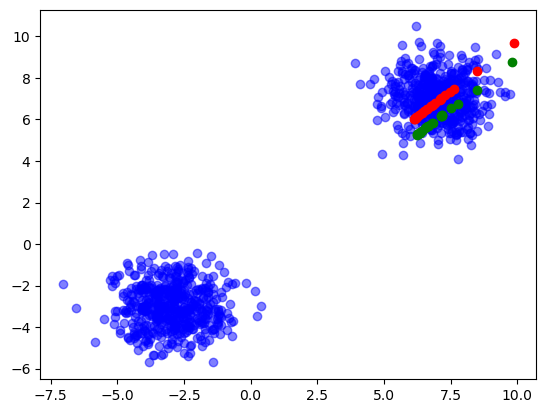

In [1]:
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np

# Define the generator network for Info-GAN
class InfoGenerator(nn.Module):
    def __init__(self, z_dim, c_dim, output_dim):
        super(InfoGenerator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(z_dim + c_dim, 128),
            nn.ReLU(),
            nn.Linear(128, output_dim)
        )
    
    def forward(self, x, c):
        x = torch.cat([x, c], dim=1)
        return self.model(x)

# Define the discriminator network for Info-GAN
class InfoDiscriminator(nn.Module):
    def __init__(self, input_dim):
        super(InfoDiscriminator, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, 1),
            nn.Sigmoid()
        )
    
    def forward(self, x):
        return self.model(x)

# Define the Q-network for Info-GAN
class QNetwork(nn.Module):
    def __init__(self, input_dim, c_dim):
        super(QNetwork, self).__init__()
        self.model = nn.Sequential(
            nn.Linear(input_dim, 128),
            nn.ReLU(),
            nn.Linear(128, c_dim)
        )
    
    def forward(self, x):
        return self.model(x)

# Parameters
z_dim = 2
c_dim = 2
data_dim = 2
num_epochs = 10000
batch_size = 64
learning_rate = 0.0002

# Data generation
def generate_real_data(num_samples):
    circle_1 = np.random.randn(num_samples // 2, 2) + np.array([7, 7])
    circle_2 = np.random.randn(num_samples // 2, 2) + np.array([-3, -3])
    return np.vstack((circle_1, circle_2)).astype(np.float32)

real_data = torch.tensor(generate_real_data(1000))

# Create models
generator = InfoGenerator(z_dim, c_dim, data_dim)
discriminator = InfoDiscriminator(data_dim)
q_network = QNetwork(data_dim, c_dim)

# Loss and optimizers
criterion_D = nn.BCELoss()
criterion_Q = nn.MSELoss()
optimizer_G = optim.Adam(generator.parameters(), lr=learning_rate)
optimizer_D = optim.Adam(discriminator.parameters(), lr=learning_rate)
optimizer_Q = optim.Adam(q_network.parameters(), lr=learning_rate)

# Training
for epoch in range(num_epochs):
    # Train Discriminator
    real_labels = torch.ones(batch_size, 1)
    fake_labels = torch.zeros(batch_size, 1)

    real_samples = real_data[torch.randint(0, real_data.size(0), (batch_size,))]
    z = torch.randn(batch_size, z_dim)
    c = torch.eye(2)[torch.randint(0, 2, (batch_size,))]
    fake_samples = generator(z, c)

    outputs_real = discriminator(real_samples)
    outputs_fake = discriminator(fake_samples)

    loss_real = criterion_D(outputs_real, real_labels)
    loss_fake = criterion_D(outputs_fake, fake_labels)
    loss_D = loss_real + loss_fake

    optimizer_D.zero_grad()
    loss_D.backward()
    optimizer_D.step()

    # Train Generator and Q-network
    z = torch.randn(batch_size, z_dim)
    c = torch.eye(2)[torch.randint(0, 2, (batch_size,))]
    fake_samples = generator(z, c)
    outputs = discriminator(fake_samples)
    q_outputs = q_network(fake_samples)

    loss_G = criterion_D(outputs, real_labels)
    loss_Q = criterion_Q(q_outputs, c)

    optimizer_G.zero_grad()
    optimizer_Q.zero_grad()
    loss_G.backward(retain_graph=True)  # Retain the computation graph
    loss_Q.backward()
    optimizer_G.step()
    optimizer_Q.step()

    if (epoch+1) % 1000 == 0:
        print(f'Epoch [{epoch+1}/{num_epochs}], Loss D: {loss_D.item()}, Loss G: {loss_G.item()}, Loss Q: {loss_Q.item()}')

# Generate and plot data points for each category
z = torch.randn(25, z_dim)
c1 = torch.eye(2)[torch.zeros(25, dtype=torch.long)]
c2 = torch.eye(2)[torch.ones(25, dtype=torch.long)]
generated_data1 = generator(z, c1).detach().numpy()
generated_data2 = generator(z, c2).detach().numpy()

plt.scatter(real_data[:, 0], real_data[:, 1], color='blue', alpha=0.5)
plt.scatter(generated_data1[:, 0], generated_data1[:, 1], color='red')
plt.scatter(generated_data2[:, 0], generated_data2[:, 1], color='green')
plt.show()
